In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ails_miccai_uwf4dr_challenge.config import PROJ_ROOT
from ails_miccai_uwf4dr_challenge.datasetPreparation import DatasetBuilder, CustomDataset
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt
import numpy as np

2024-06-28 17:55:16.882 | INFO     | ails_miccai_uwf4dr_challenge.config:<module>:11 - PROJ_ROOT path is: /Users/moritz/Documents/Master/AILS-MICCAI-UWF4DR-Challenge


### Original dataset

In [ ]:
train_transforms = v2.Compose([
    v2.ToPILImage(),
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
    #v2.RandomResizedCrop(size=(512, 512), scale=(0.8, 1.0)),
])

val_transforms = v2.Compose([
    v2.ToPILImage(),
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
])

In [10]:
train, val = DatasetBuilder(dataset='original', task='full').get_train_val()

In [11]:
train_data = CustomDataset(train, transform=train_transforms)
val_data = CustomDataset(val, transform=val_transforms)

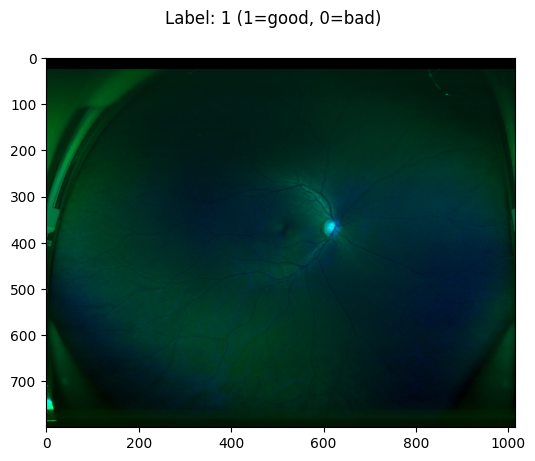

In [12]:
num = np.random.randint(len(train_data))
img, label = train_data[num]

plt.imshow(img.permute(1,2,0))
plt.suptitle(f'Label: {label} (1=good, 0=bad)')
plt.show()

#### DeepDRiD

In [14]:
transforms = v2.Compose([
    v2.ToPILImage(),
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(512, 512), scale=(0.8, 1.0)),
])

train, val = DatasetBuilder(dataset='deepdrid', task='full').get_train_val()
train_data = CustomDataset(train, transform=train_transforms)
val_data = CustomDataset(val, transform=val_transforms)

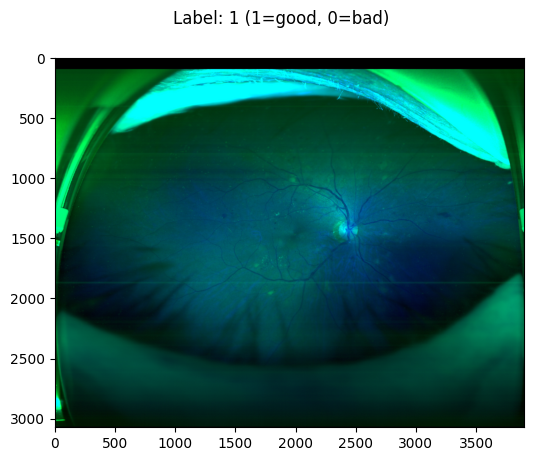

In [16]:

num = np.random.randint(len(train_data))
img, label = train_data[num]

plt.imshow(img.permute(1,2,0))
plt.suptitle(f'Label: {label} (1=good, 0=bad)')
plt.show()

Using cache found in /Users/moritz/.cache/torch/hub/pytorch_vision_v0.9.0
